<a href="https://colab.research.google.com/github/aramirezfr/Aircraft-Acquisition-Proposal/blob/master/CNN_Pneumonia_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pneumonia Image Binary Classifier Model** \
By: Adriana Ramirez Franco. \
Email: aramirezfr20@gmail.com \
Github: @aramirezfr

# Business Understanding

**About Pneumonia:** \
Pneumonia is a serious respiratory condition that can lead to severe complications, especially if not diagnosed early. Timely and accurate diagnosis is crucial to initiate appropriate treatment and reduce morbidity and mortality, particularly among vulnerable populations like children, the elderly, and individuals with compromised immune systems.


**Why not using traditional in person diagnosis by doctors?** \
Traditional diagnosis of pneumonia relies heavily on radiologists interpreting chest X-rays, which can be time-consuming and prone to human error, especially under high workloads or in resource-limited settings.

**How can we support a professional doctor's diagnosis?** \
To address these challenges, this project aims to develop a convolutional neural network (CNN)-based binary classification model to automatically identify pneumonia from chest X-ray images. By distinguishing between normal and pneumonia-affected lungs, the model will assist healthcare professionals in making quicker, more accurate decisions. This model can improve diagnostic efficiency, alleviate the burden on radiologists, enhance patient outcomes, and provide valuable support in remote or underserved areas where access to specialized radiology expertise is limited.

## Benefits of implementing a Medical Image Classifier

**Medical image classification using machine learning** is critically important for several reasons:  

### **1. Faster Diagnosis and Treatment**  
Convolutional neural networks (CNNs), can analyze medical images much faster than humans. This reduces the time required for diagnosis, enabling quicker initiation of treatment, which is particularly crucial for conditions like pneumonia, cancer, or strokes where delays can have life-threatening consequences.

### **2. Improved Accuracy and Consistency**  
Machine learning systems can match or exceed the diagnostic accuracy of radiologists in specific tasks, as they learn from large datasets and can identify patterns that may be difficult for human experts to detect. This ensures consistency in diagnosis, reducing human errors caused by fatigue or cognitive bias.

### **3. Addressing Resource Gaps**  
In many regions, especially remote or low-resource settings, there is a shortage of radiologists and specialized healthcare professionals. Machine learning models can act as decision-support tools to help non-specialists make informed diagnoses or prioritize cases that need expert attention.

### **4. Reduced Workload for Healthcare Professionals**  
With the increasing demand for medical imaging, radiologists often have to analyze hundreds of images per day. AI systems can help pre-screen images or highlight abnormal cases, allowing radiologists to focus their expertise on the most critical cases, improving workflow efficiency.

### **5. Continuous Learning and Scalability**  
Machine learning models can continuously improve as they are trained with new data, making them adaptable to emerging medical conditions. They are also scalable, meaning once a model is developed, it can be deployed across multiple healthcare systems globally with minimal modifications.

### **6. Enabling Preventive Healthcare**  
Automated image classification can also aid in early detection of diseases that may not exhibit symptoms initially, facilitating preventive interventions. For instance, AI models used for early screening of pneumonia or lung cancer can detect subtle abnormalities that might be missed in routine examinations.

In summary, machine learning-based medical image classification is transforming healthcare by enhancing diagnostic accuracy, improving efficiency, and expanding access to quality care, making it an essential tool for modern medicine.

# Data Understanding

1. **Source and Properties of the Data**:
   - This dataset, published by Paul Mooney on Kaggle, originates from the Guangzhou Women and Children’s Medical Center. It contains labeled chest X-ray images grouped into "Pneumonia" (with bacterial and viral categories) and "Normal."
   - The images are grayscale with consistent resolution, showing clear lung structures. The dataset is ideal for supervised machine learning tasks since each image is accurately labeled as pneumonia or healthy, making it a reliable choice for binary classification.



2. **Size of Data and Descriptive Statistics of Features**:
   - The dataset comprises 5,863 images, divided into training, validation, and test sets, enabling efficient model evaluation. The training set includes around 4,000 images, with a smaller validation and test set.
   - Key features include image pixel intensity values, which represent lung opacity patterns. The dataset contains approximately three times more pneumonia cases than normal ones, making it slightly imbalanced.

3. **Feature Suitability**:
   The primary feature—chest X-ray images—allows for visual detection of pneumonia markers, such as lung opacity and structure irregularities. This aligns well with the objective to classify cases of pneumonia versus healthy lungs based on these medical imaging patterns.



4. **Limitations of Using This Data**:
   - *Challenges*: The dataset's class imbalance (more pneumonia cases than normal) could affect model performance. The variation in image quality and possible label inconsistencies may also introduce noise, impacting model accuracy and generalizability.
   - *Generalization Limits*: Since the dataset was sourced from a specific medical center, models trained on it might not generalize well to X-rays from different machines or patient demographics.


For further details, refer to the Kaggle dataset page: [Chest X-Ray Images (Pneumonia) on Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia).

# Data Preparation

I will begin downloading the necessary file from Kaggle, unzip the file, and I will be importing the necessary libraries for this project.

In [1]:
#Downloading the data file from Kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:37<00:00, 95.5MB/s]
100% 2.29G/2.29G [00:37<00:00, 66.0MB/s]


In [2]:
#Unzip the data folder
!unzip chest-xray-pneumonia.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0446-0001.j

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

import os

-----------------

In [4]:
#setting the directory that contains the kaggle data file
directory=os.listdir('data/chest_xray')
print(directory) #listing contents of directory

['__MACOSX', 'chest_xray', 'val', 'test', 'train']


There are 3 directories inside the chest_xray file: training, validation and testing directory.

In [5]:
#setting the directories as variables
train_dir='data/chest_xray/train'
val_dir='data/chest_xray/val'
test_dir='data/chest_xray/test'

Using **image_dataset_from_directory** function to create a dataset from images stored in the previous directories.
I will create 3 different datasets, one for each directory.

In [6]:
#creating datasets for all directories
train=keras.utils.image_dataset_from_directory(
    directory=train_dir,
    shuffle=True,
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(150, 150))

test = keras.utils.image_dataset_from_directory (
    directory = test_dir,
    shuffle=True,
    labels = "inferred",
    label_mode='binary',
    batch_size = 32,
    image_size = (150,150))
validation = keras.utils.image_dataset_from_directory (
    directory = val_dir,
    shuffle=True,
    labels ="inferred",
    label_mode='binary',
    batch_size = 32,
    image_size = (150 , 150))

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


Each file in 'chest_xray' includes a set of images with **"Normal"** x-rays and another set of x-rays with **"Pneumonia"**.

In [7]:
#checking the name of the classes in the files
print(train.class_names)
print(test.class_names)
print(validation.class_names)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


------------------

**Setting up the Training data:**

The model uses training data to learn patterns, relationships, and rules that map inputs to outputs. The quality and diversity of the training data significantly affect the model's ability to generalize.A model trained on imbalanced data may not generalize well to real-world scenarios where the distribution of classes might be different. This can lead to poor performance in practical applications.
We need to analyze if we have any imbalance.

In [8]:
#defining the directories of training images
pneumonia_dir = 'data/chest_xray/train/PNEUMONIA'
normal_dir = 'data/chest_xray/train/NORMAL'

#list files in each directory
pneumonia_files = os.listdir(pneumonia_dir)
normal_files = os.listdir(normal_dir)

#checking the quantity of images in each directory
len(pneumonia_files)+len(normal_files)

5216

There are 5216 images to train on that belong to the subgroups **'PNEUMONIA'** and **'NORMAL'**.

-----------------------------------------------------------------------------------------------------------------------------

What is the difference between X-rays that show lungs with pneumonia and normal healthy lungs?

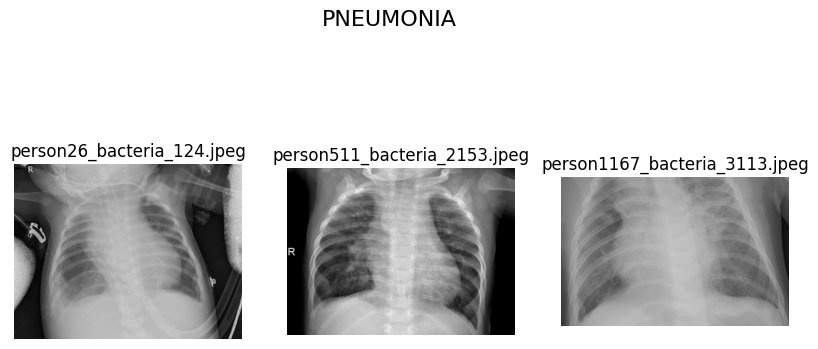

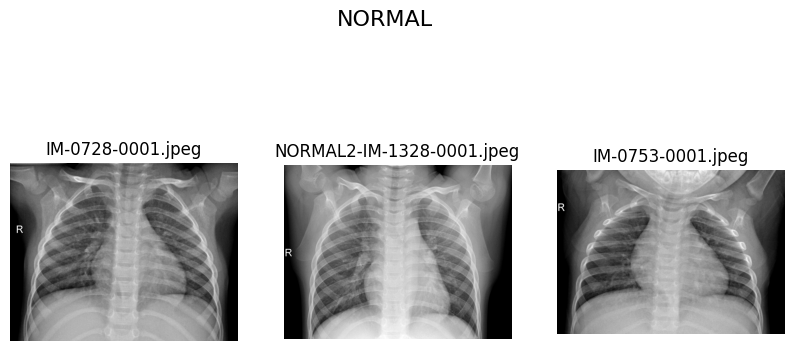

In [9]:
#plot the count of images
def display_images(image_files, image_dir, num_images=5, title=''):
    plt.figure(figsize=(10, 5))
    plt.suptitle(title, fontsize=16)

    for i, image_name in enumerate(image_files[:num_images]):
        image_path = os.path.join(image_dir, image_name)
        img = mpimg.imread(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')  #using 'gray' for grayscale images
        plt.title(image_name)
        plt.axis('off')

#display images from PNEUMONIA class
display_images(pneumonia_files, pneumonia_dir, num_images=3, title='PNEUMONIA')

#display images from NORMAL class
display_images(normal_files, normal_dir, num_images=3, title='NORMAL')

**DIFFERENCE OF LUNGS' X-RAYS WITH PNEUMONIA VS NORMAL:**
- In X-ray images, healthy lungs appear clear with visible lung structures like the diaphragm, heart, and air-filled bronchial tubes. \
-In contrast, lungs infected with pneumonia often show opacities or white patches, indicating fluid or inflammation. Pneumonia can also cause reduced lung expansion and increased density in affected areas.

-----------------------

**Imbalanced data:**
Checking for the count of normal x-rays and x-rays with pneumonia in the training folder.

In [10]:
#checking the count of both values
len(pneumonia_files), len(normal_files)

(3875, 1341)

* Out of the **100%** (5,216) training images available, **74%** (3,875) of them are Pneumonia images and **26%** (1,341) of them are Normal Lung images. This demonstrates class imbalance. Find a graph below. \
* In an ideally balanced dataset, each class would have approximately around, but not exactly 50% for each class to work with a binary classification problem. \

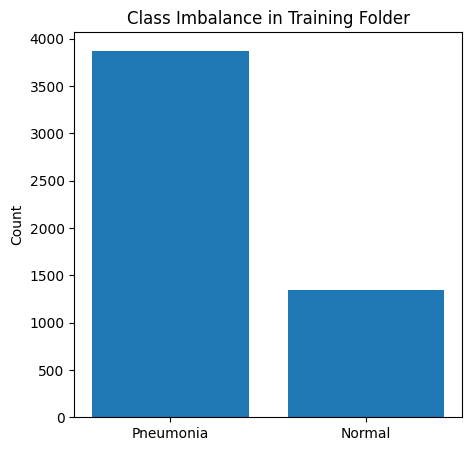

In [11]:
#plotting the count of pneumonia and normal class
# create a variable with the counts:
pneumonia_count = len(pneumonia_files)
normal_count = len(normal_files)

#define the labels and their corresponding counts
labels = ['Pneumonia', 'Normal']
counts = [pneumonia_count, normal_count]

#plot
plt.figure(figsize=(5, 5))
plt.bar(labels, counts) #labels on the x-axis and counts on the y-axis
plt.ylabel('Count')
plt.title('Class Imbalance in Training Folder')
plt.show()

## Data Augmentation:

Due to the significant class imbalance in the training dataset, I will use the **ImageDataGenerator** to generate synthetic images. This approach will help balance the classes and reduce the risk of overfitting by augmenting the dataset with varied versions of the existing images.

In [12]:
#setting parameters
img_size=(100,100)
SHAPE=(100,100,3)
batch_size=32

In [13]:
#setting the data generator for the train and validation datasets
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=False,
                             fill_mode='nearest')

#setting the test data generator
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [14]:
#applying the data generator to training and validation sets
train_set=datagen.flow_from_directory(train_dir,
                                      class_mode='binary',
                                      target_size=img_size,
                                      batch_size=batch_size,
                                      #shuffle=False,
                                      seed=42)

val_set=datagen.flow_from_directory(val_dir,
                                      class_mode='binary',
                                      target_size=img_size,
                                      batch_size=batch_size,
                                      shuffle=False,
                                      seed=42)
test_set=test_datagen.flow_from_directory(test_dir,
                                      class_mode='binary',
                                      target_size=img_size,
                                      batch_size=batch_size,
                                      shuffle=False,
                                      seed=42)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [37]:
import math
steps_per_epoch = math.ceil(train_set.samples / batch_size)

Now that the directories will be going through **ImageDataGenerator** their names (train_dir, val_dir, test_dir) will change to: train_set, val_set and test_set.

# Modeling:

**Model building** is an iterative process that begins with developing a baseline model, which serves as a reference point for comparison. Each subsequent model iteration will be designed with clear justifications based on the performance of previous models. \
- By systematically refining and evaluating these iterations, the goal is to identify the model that delivers the best performance for this binary classification task.

## Baseline model:

This **baseline model** is a simple convolutional neural network (CNN) designed for binary classification. \
It consists of a convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and max-pooling to reduce spatial dimensions. The feature maps are then flattened and passed through a fully connected layer with 128 neurons and ReLU activation. Finally, a single output neuron with a sigmoid activation is used to predict the binary class.

In [41]:
#setting up the baseline model
base_model = models.Sequential([

    #first convolutional layer
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(100,100, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    #flatten the feature maps
    layers.Flatten(),

    #fully connected layer
    layers.Dense(128, activation='relu'),

    #output layer with a single neuron for binary classification
    layers.Dense(1, activation='sigmoid')])

In [16]:
#setting metrics for all the models to be trained
METRICS=['accuracy',
         tf.keras.metrics.Precision(name='precision'),
         tf.keras.metrics.Recall(name='recall')]

In [46]:
#compile the model
base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

**Early Stopping:** prevents overfitting and saves resources by halting training when the model's performance no longer improves, reducing unnecessary computations.

In [67]:
early_stopping = [EarlyStopping(monitor='val_accuracy', patience=10, mode='max'),
                  ModelCheckpoint(filepath='best_model.keras',
                  monitor='val_accuracy',
                  save_best_only=True)]

In [51]:
base_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 98, 98, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 153664)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      19,669,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,671,041 (75.04 MB)

 Trainable params: 19,671,041 (75.04 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#calculates # of batches needed to cover the training set in one epoch
steps_per_epoch = train_set.samples // batch_size

#calculates # of batches needed to cover the validation set
validation_steps = val_set.samples // batch_size

In [54]:
#train base model
base_model_hist = base_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10,
                                 callbacks=early_stopping,
                                 validation_data=val_set,
                                 shuffle=False)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.8338 - loss: 4.4486 - precision: 0.8934 - recall: 0.8798 - val_accuracy: 0.5000 - val_loss: 23.2785 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 23.7270 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.8353 - loss: 3.7764 - precision: 0.8867 - recall: 0.8930 - val_accuracy: 0.5625 - val_loss: 3.7082 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 4.2105 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.8613 - loss: 1.8078 - precision: 0.9069 - recall: 0.9053

In [72]:
_#evaluate base model
results_base_train=base_model.evaluate(test_set)
results_base_train

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 431ms/step - accuracy: 0.7162 - loss: 2.8982 - precision: 0.4140 - recall: 0.6313


[1.866260051727295, 0.8125, 0.7898089289665222, 0.9538461565971375]

In [64]:
#unpacking values
basetest_loss, basetest_accuracy, basetest_precision, basetest_recall = results_base_train

#print the result values
print(f"Test accuracy: {basetest_accuracy:.2f}")
print(f"Test precision: {basetest_precision:.2f}")
print(f"Test recall: {basetest_recall:.2f}")

Test accuracy: 0.81
Test precision: 0.79
Test recall: 0.95


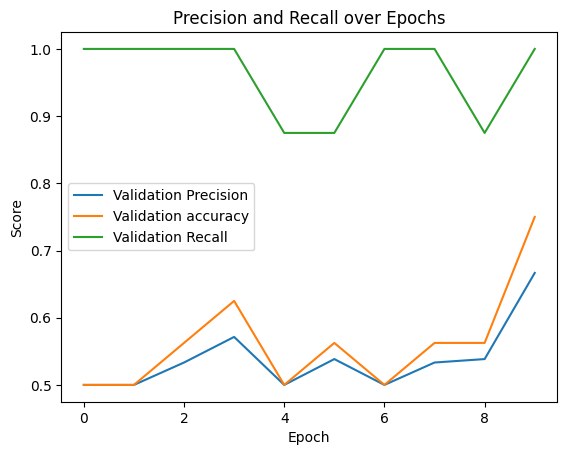

In [57]:
#plot precision and recall
#validation model's performance on unseen data
plt.plot(base_model_hist.history['val_precision'], label='Validation Precision')
plt.plot(base_model_hist.history['val_accuracy'], label='Validation accuracy')
plt.plot(base_model_hist.history['val_recall'], label='Validation Recall')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision and Recall over Epochs(Baseline Model)')
plt.legend()
plt.show()

## Model 1:

Model 1 is more complex, having two convolutional layers and it starts with 32 filters in the first layer and increases to 64 in the second layer.

In [68]:
#test 1 model
test1_model= models.Sequential([

    #first convolutional layer
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,100, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    #second convolutional layer
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    #flatten the feature maps
    layers.Flatten(),

    #fully connected layer
    layers.Dense(128, activation='relu'),

    #output layer with a single neuron for binary classification
    layers.Dense(1, activation='sigmoid')])

In [69]:
#compile the model
test1_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [70]:
#train the test1_model
test1_history = test1_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10,
                                 callbacks=early_stopping,
                                 validation_data=val_set,
                                 shuffle=False)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 159s 962ms/step - accuracy: 0.6930 - loss: 28.9795 - precision: 0.7477 - recall: 0.9438 - val_accuracy: 0.5000 - val_loss: 0.7261 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7116 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 158s 971ms/step - accuracy: 0.7789 - loss: 0.4684 - precision: 0.7896 - recall: 0.9601 - val_accuracy: 0.5000 - val_loss: 1.0359 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.9560 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 157s 960ms/step - accuracy: 0.8471 - loss: 0.3432 - precision: 0.8870 - recall:

In [32]:
#Evaluating the results of the model 1 with testing data
test1_results= test1_model.evaluate(test_set)
print("Evaluation results:", test1_results)

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 417ms/step - accuracy: 0.4567 - loss: 0.9439 - precision: 0.3381 - recall: 0.6540
Evaluation results: [0.6021679043769836, 0.7019230723381042, 0.6841155290603638, 0.971794843673706]


In [33]:
#unpacking necessary metrics
test1_loss, test1_accuracy, test1_precision, test1_recall = test1_results

# Print the results
print(f"Test accuracy: {test1_accuracy:.2f}")
print(f"Test precision: {test1_precision:.2f}")
print(f"Test recall: {test1_recall:.2f}")

Test accuracy: 0.70
Test precision: 0.68
Test recall: 0.97


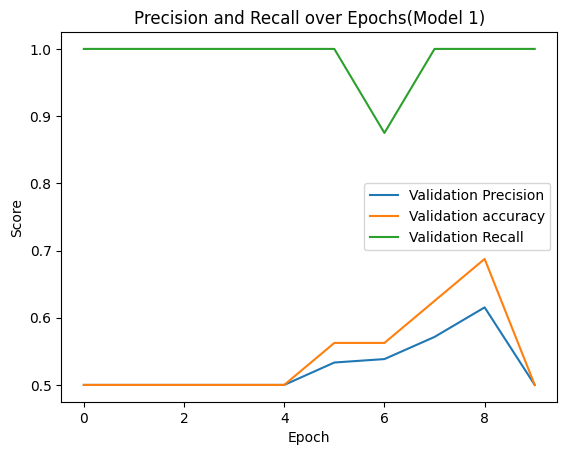

In [73]:
#plot precision and recall
#validation model's performance on unseen data
plt.plot(test1_history.history['val_precision'], label='Validation Precision')
plt.plot(test1_history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(test1_history.history['val_recall'], label='Validation Recall')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision, Accuracy Recall over Epochs(Model 1)')
plt.legend()
plt.show()

## Model 2:

In [74]:
#setting up model 2
test2_model = Sequential([
    #first convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    #second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    #third conv layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    #flat layer
    Flatten(),
    #fully connected layer
    Dense(128, activation='relu'),
    #adding dropout layer
    Dropout(0.5),  #to prevent overfitting
    Dense(1, activation='sigmoid')  #output layer for binary classification
])

In [75]:
#compile for model 2
test2_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [76]:
#print summary model of architecture
test2_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,731,905 (6.61 MB)

 Trainable params: 1,731,905 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model 2
test2_history = test2_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10,
                                 callbacks=early_stopping,
                                 validation_data=val_set,
                                 shuffle=False)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 165s 988ms/step - accuracy: 0.7246 - loss: 3.2019 - precision: 0.7978 - recall: 0.8906 - val_accuracy: 0.6250 - val_loss: 0.6965 - val_precision: 0.6250 - val_recall: 0.6250
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.5946 - val_precision: 0.7143 - val_recall: 0.6250
Epoch 3/10
 70/163 ━━━━━━━━━━━━━━━━━━━━ 1:46 1s/step - accuracy: 0.8532 - loss: 0.3803 - precision: 0.9116 - recall: 0.8907

In [80]:
#evaluate and print the results of model 2
test2_results= test2_model.evaluate(test_set)
print("Evaluation results:", test2_results)

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 453ms/step - accuracy: 0.8958 - loss: 0.3663 - precision: 0.5293 - recall: 0.6367
Evaluation results: [0.28310897946357727, 0.9102563858032227, 0.9093137383460999, 0.9512820243835449]


In [81]:
#unpack and print the metrics obtained from model 2
test2_loss, test2_accuracy, test2_precision, test2_recall = test2_results

print(f"Test accuracy: {test2_accuracy:.2f}")
print(f"Test precision: {test2_precision:.2f}")
print(f"Test recall: {test2_recall:.2f}")

Test accuracy: 0.91
Test precision: 0.91
Test recall: 0.95


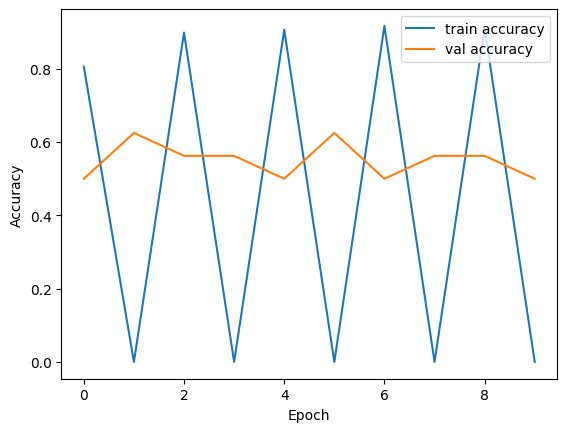

In [82]:
#plot precision and recall
#validation model's performance on unseen data
plt.plot(test2_history.history['val_precision'], label='Validation Precision')
plt.plot(test2_history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(test2_history.history['val_recall'], label='Validation Recall')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision, Accuracy Recall over Epochs(Model 2)')
plt.legend()
plt.show()

After going through a thorough analysis, Model 2 is the one that has performed the best out of the 3 options that were modeled. Since I was using early stopping. I will proceed to run it organically in the following section "Evaluation".

## Model 3:

In [83]:
#setting up model 3
test3_model = models.Sequential([
    #first convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),

    #second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #third conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #fourth conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(), #flatten layer

    #fully connected Dense layer with 512 neurons
    #layers.Dense(512, activation='relu'),
    #layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1), #10% of neurons will be dropped
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2), #20% of neurons will be dropped
    #Increasing the dropout rate can provide stronger regularization

    #batch normalization maintains a stable distribution of activations throughout the network
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    #output layer: dense layer with 2 layers
    layers.Dense(1, activation='sigmoid')  #for binary classification
])


In [84]:
#compile for model 3
test3_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [85]:
#print summary model 3 of architecture
test3_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,150,017 (4.39 MB)

 Trainable params: 1,146,945 (4.38 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [86]:
#train the model 3
test3_history = test3_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10,
                                 #callbacks=early_stopping,
                                 validation_data=val_set,
                                 shuffle=False)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 162s 957ms/step - accuracy: 0.7442 - loss: 0.5830 - precision: 0.8876 - recall: 0.8207 - val_accuracy: 0.5000 - val_loss: 2.0116 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.9606 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 202s 968ms/step - accuracy: 0.8584 - loss: 0.3336 - precision: 0.9032 - recall: 0.9044 - val_accuracy: 0.5000 - val_loss: 1.4692 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.4965 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 156s 958ms/step - accuracy: 0.8761 - loss: 0.2955 - precision: 0

In [87]:
#evaluate and print the results of model 3
test3_results= test3_model.evaluate(test_set)
print("Evaluation results:", test3_results)

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 361ms/step - accuracy: 0.8741 - loss: 0.4040 - precision: 0.5313 - recall: 0.5786
Evaluation results: [0.4531348645687103, 0.8605769276618958, 0.9105691313743591, 0.8615384697914124]


In [88]:
#unpack and print the metrics obtained from model 3
test3_loss, test3_accuracy, test3_precision, test3_recall = test3_results

print(f"Test accuracy: {test3_accuracy:.2f}")
print(f"Test precision: {test3_precision:.2f}")
print(f"Test recall: {test3_recall:.2f}")

Test accuracy: 0.86
Test precision: 0.91
Test recall: 0.86


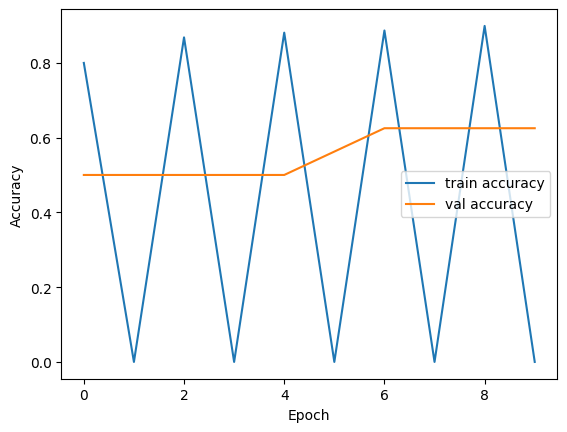

In [89]:
#plot the training history
plt.plot(test3_history.history['accuracy'], label='train accuracy')
plt.plot(test3_history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model 4:

In [90]:
#setting up model 4
test4_model = models.Sequential([
    #first convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),

    #second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #third conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #fourth conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #fifth conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(), #flatten layer

    #fully connected Dense layer with 512 neurons
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1), #10% of neurons will be dropped
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2), #20% of neurons will be dropped
    #Increasing the dropout rate can provide stronger regularization
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    #layers.Dropout(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2), #20% of neurons will be dropped
    #Increasing the dropout rate can provide stronger regularization


    #batch normalization maintains a stable distribution of activations throughout the network
    layers.BatchNormalization(),

    #output layer: dense layer with 2 layers
    layers.Dense(1, activation='sigmoid')  #for binary classification
])


In [91]:
#compile for model 4
test4_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [92]:
#print summary for model 4 of architecture
test4_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 958,081 (3.65 MB)

 Trainable params: 955,009 (3.64 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [93]:
#train the model 4
test4_history = test4_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10,
                                 #callbacks=early_stopping,
                                 validation_data=val_set,
                                 shuffle=False)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 162s 958ms/step - accuracy: 0.7183 - loss: 0.6314 - precision: 0.8768 - recall: 0.7820 - val_accuracy: 0.5625 - val_loss: 0.7500 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5625 - val_loss: 0.7027 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 157s 961ms/step - accuracy: 0.8678 - loss: 0.3195 - precision: 0.9078 - recall: 0.9156 - val_accuracy: 0.5625 - val_loss: 1.4686 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5625 - val_loss: 1.5106 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 203s 966ms/step - accuracy: 0.8811 - loss: 0.2723 - precision: 0.9213 - recall: 

In [94]:
#evaluate and print the results of model 4
test4_results= test4_model.evaluate(test_set)
print("Evaluation results:", test4_results)

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - accuracy: 0.8727 - loss: 0.3330 - precision: 0.6015 - recall: 0.4556
Evaluation results: [0.5048031210899353, 0.754807710647583, 0.9610894918441772, 0.6333333253860474]


In [95]:
#unpack and print the metrics obtained from model 4
test4_loss, test4_accuracy, test4_precision, test4_recall = test4_results

print(f"Test accuracy: {test4_accuracy:.2f}")
print(f"Test precision: {test4_precision:.2f}")
print(f"Test recall: {test4_recall:.2f}")

Test accuracy: 0.75
Test precision: 0.96
Test recall: 0.63


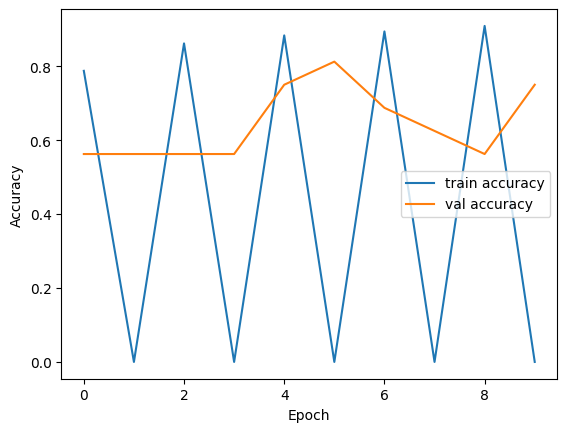

In [96]:
#plot the training history
plt.plot(test4_history.history['accuracy'], label='train accuracy')
plt.plot(test4_history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluation:

## Evaluating Model 2:

In [ ]:
#Model 2
test2_model = Sequential([
    #first convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    #second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    #third conv layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    #flat layer
    Flatten(),
    #fully connected layer
    Dense(128, activation='relu'),
    #adding dropout layer
    Dropout(0.5),  #to prevent overfitting
    Dense(1, activation='sigmoid')  #output layer for binary classification
])

In [ ]:
#compile for model 2
test2_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
#print summary model of architecture
test2_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,731,905 (6.61 MB)

 Trainable params: 1,731,905 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model 2
test2_history = test2_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10,#not running with early stopping anymore
                                 validation_data=val_set,
                                 shuffle=False)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 162s 977ms/step - accuracy: 0.7013 - loss: 3.6374 - precision: 0.7550 - recall: 0.8712 - val_accuracy: 0.5625 - val_loss: 1.1335 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5625 - val_loss: 1.1750 - val_precision: 0.5333 - val_recall: 1.0000
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 158s 968ms/step - accuracy: 0.8254 - loss: 0.3958 - precision: 0.8761 - recall: 0.8927 - val_accuracy: 0.6250 - val_loss: 0.7083 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.7123 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 201s 965ms/step - accuracy: 0.8704 - loss: 0.3088 - precision: 0.9139 - recall: 

In [ ]:
#evaluate and print the results of model 2
test2_results= test2_model.evaluate(test_set)
print("Evaluation results:", test2_results)

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 352ms/step - accuracy: 0.8974 - loss: 0.3943 - precision: 0.5466 - recall: 0.6048
Evaluation results: [0.34323850274086, 0.8942307829856873, 0.9240837693214417, 0.9051281809806824]


In [ ]:
#unpack and print the metrics obtained from model 2
test2_loss, test2_accuracy, test2_precision, test2_recall = test2_results

print(f"Test accuracy: {test2_accuracy:.2f}")
print(f"Test precision: {test2_precision:.2f}")
print(f"Test recall: {test2_recall:.2f}")

Test accuracy: 0.89
Test precision: 0.92
Test recall: 0.91


## Evaluating Model 3:

In [ ]:
#setting up model 3
test3_model = models.Sequential([
    #first convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),

    #second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #third conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #fourth conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(), #flatten layer

    #fully connected Dense layer with 512 neurons
    #layers.Dense(512, activation='relu'),
    #layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1), #10% of neurons will be dropped
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2), #20% of neurons will be dropped
    #Increasing the dropout rate can provide stronger regularization

    #batch normalization maintains a stable distribution of activations throughout the network
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    #output layer: dense layer with 2 layers
    layers.Dense(1, activation='sigmoid')  #for binary classification
])

In [ ]:
#compile for model 3
test3_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
#print summary model 3 of architecture
test3_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,150,017 (4.39 MB)

 Trainable params: 1,146,945 (4.38 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [ ]:
#train the model 3
test3_history = test3_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10, #early stopping removed
                                 validation_data=val_set,
                                 shuffle=False)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.8956 - loss: 0.2696 - precision: 0.9239 - recall: 0.9362 - val_accuracy: 0.5000 - val_loss: 1.9341 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.7051 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 186s 916ms/step - accuracy: 0.9169 - loss: 0.2110 - precision: 0.9420 - recall: 0.9462 - val_accuracy: 0.6250 - val_loss: 1.7994 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 2.1042 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 150s 919ms/step - accuracy: 0.9228 - loss: 0.1984 - precision: 0.9492 - recall: 0.9

In [ ]:
#evaluate and print the results of model 3
test3_results= test3_model.evaluate(test_set)
print("Evaluation results:", test3_results)

In [ ]:
#Create a classification report.
report = classification_report(y_test, y_pred_classes)
print("Classification Report:\n", report)

In [ ]:
#unpack and print the metrics obtained from model 3
test3_loss, test3_accuracy, test3_precision, test3_recall = test3_results

print(f"Test accuracy: {test3_accuracy:.2f}")
print(f"Test precision: {test3_precision:.2f}")
print(f"Test recall: {test3_recall:.2f}")

Model 3 had perfect recall score, that is not enough to make a decision on making it the best model.
Running the F-1 score of both models will help make the right decision.

In [ ]:
#calculate f-1 score
# after running the F-1 score it has been determined that model 2 is the best model to solve the issue.

----------------------

ALL THE LINES UNDER ARE TO BE CHECKED AFTER EVALUATING MODEL 2 AND 3. When done make sure to do a confusion matrix for both and a classification report.

In [ ]:
#checking accuracy:
results_train= model.evaluate(train, batch_size=128)
results_train

In [ ]:
results_test= model.evaluate(test, batch_size=128)
results_test

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,10))


Create a confusion Matrix to analyze the description of the performace of the classification model on the set of test data.

In [ ]:
cm= confusion_matrix(y_true=, y_pred=result)

In [ ]:
Create a classification report.

In [ ]:

y_pred=model.predict(test)
y_pred_classes = np.round(y_pred).astype(int)
#generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

#plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Summary:

## Results:

Training process(epochs?)\
how long does each epoch takes?\
total training time?\
results? \

true positives!!\
true negatives!!\
false positives??\
false negatives X (minimize) \